In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/feature_engineering-2.csv')

In [8]:
df.shape

(3807, 24)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3807 entries, 0 to 3806
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3807 non-null   object 
 1   society              3307 non-null   object 
 2   sector               3807 non-null   object 
 3   price                3780 non-null   float64
 4   price_per_sqft       3780 non-null   float64
 5   area                 3780 non-null   float64
 6   areawithtype         3807 non-null   object 
 7   bedroom              3807 non-null   int64  
 8   bathroom             3807 non-null   int64  
 9   balcony              3807 non-null   object 
 10  floornum             3805 non-null   float64
 11  facing               3807 non-null   object 
 12  agepossession        3807 non-null   object 
 13  super_built_up_area  1913 non-null   float64
 14  built_up_area        1740 non-null   float64
 15  carpet_area          1942 non-null   f

In [10]:
df.describe()

,price,price_per_sqft,area,bedroom,bathroom,floornum,super_built_up_area,built_up_area,carpet_area,study_room,store_room,others_room,pooja_room,na_room,servant_room,furnishing_type,luxury_score
count,3780.000000,3780.000000,3780.000000,3807.000000,3807.000000,3805.000000,1913.000000,1740.000000,1942.000000,3807.000000,3807.000000,3807.000000,3807.000000,3807.0,3807.000000,3807.00000,3807.000000
mean,2.507732,13822.900529,2847.883069,3.343315,3.409246,6.773456,1922.111631,2356.200787,2485.753212,0.189125,0.090360,0.110323,0.173890,0.0,0.356186,1.37431,68.553717
std,2.951106,23085.671833,22798.325303,1.879885,1.933905,6.030564,767.376482,17684.032238,22386.590210,0.391660,0.286734,0.313333,0.379065,0.0,0.478934,0.89572,54.609151
min,0.075000,4.000000,50.000000,1.000000,1.000000,0.000000,89.000000,14.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
25%,0.940000,6812.000000,1224.000000,2.000000,2.000000,2.000000,1457.000000,1100.000000,830.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,24.000000
50%,1.500000,9001.000000,1725.000000,3.000000,3.000000,5.000000,1828.000000,1642.000000,1296.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.00000,53.000000
75%,2.700000,13769.000000,2295.000000,4.000000,4.000000,10.000000,2215.000000,2398.250000,1790.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.00000,109.000000
max,31.500000,600000.000000,875000.000000,21.000000,21.000000,51.000000,10000.000000,737147.000000,607936.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,2.00000,174.000000


In [11]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areawithtype', 'bedroom', 'bathroom', 'balcony', 'floornum', 'facing',
       'agepossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study_room', 'store_room', 'others_room', 'pooja_room', 'na_room',
       'servant_room', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [12]:
df.sample(10)

,property_type,society,sector,price,price_per_sqft,area,areawithtype,bedroom,bathroom,balcony,...,built_up_area,carpet_area,study_room,store_room,others_room,pooja_room,na_room,servant_room,furnishing_type,luxury_score
646,flat,Alpha Corp GurgaonOne,sector 84,1.15,7496.0,1534.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,...,NaN,1260.0,1,0,0,0,0,0,2,28
1747,flat,Tulip Violet,sector 69,1.28,8111.0,1578.0,Super Built up area 1578(146.6 sq.m.),3,3,2,...,NaN,NaN,0,0,0,1,0,0,0,49
2050,flat,Viridian The Plaza,sector 106,0.46,6571.0,700.0,Carpet area: 700 (65.03 sq.m.),1,1,1,...,NaN,700.0,0,0,0,0,0,0,2,104
3351,houses,NaN,sector 3 phase 2,0.40,8000.0,500.0,Built Up area: 500 (46.45 sq.m.)Carpet area: 3...,2,1,0,...,500.0,300.0,0,0,0,0,0,0,2,0
523,flat,SS The Leaf,sector 85,1.12,6453.0,1736.0,Super Built up area 1741(161.74 sq.m.)Built Up...,2,2,3,...,1485.0,1335.0,0,0,1,0,0,0,2,49
1408,flat,BPTP Terra,sector 37d,1.67,7622.0,2191.0,Super Built up area 2191(203.55 sq.m.)Built Up...,4,4,3,...,2091.0,1991.0,0,0,0,0,0,0,0,149
3517,houses,NaN,sector 31,3.25,22429.0,1449.0,Plot area 161(134.62 sq.m.),4,4,3+,...,1449.0,NaN,1,1,0,1,0,1,0,29
2833,flat,Assotech Blith,sector 99,0.82,6007.0,1365.0,Built Up area: 1365 (126.81 sq.m.),2,2,3,...,1365.0,NaN,0,0,0,0,0,0,2,0
1753,flat,Bestech Park View Ananda,sector 81,1.15,6927.0,1660.0,Super Built up area 1660(154.22 sq.m.)Carpet a...,3,2,3+,...,NaN,1082.0,0,0,0,0,0,0,2,101
3274,houses,NaN,sector 8,0.32,7111.0,450.0,Built Up area: 450 (41.81 sq.m.)Carpet area: 3...,2,3,1,...,450.0,300.0,0,0,0,0,0,0,2,0


In [13]:
df.duplicated().sum()

125

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

**Property Type**

<Axes: xlabel='property_type'>

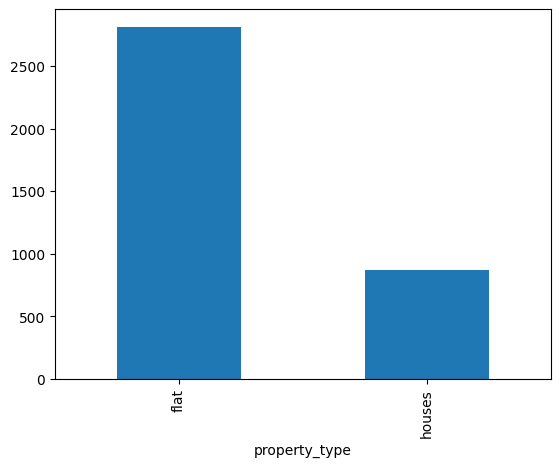

In [16]:
df['property_type'].value_counts().plot(kind='bar')

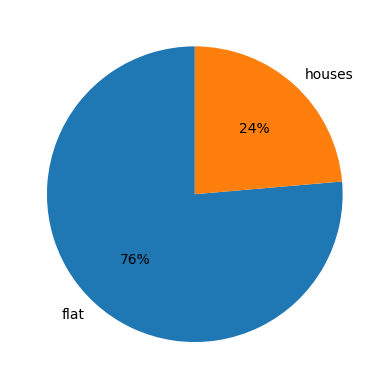

In [17]:
fig , ax = plt.subplots()
ax.pie(x=df['property_type'].value_counts(),startangle=90,autopct='%.0f%%',labels=df['property_type'].unique());


**Observations**
 * Flats are in majority(76 percent) and there are less number of houses(24 percent)
 * No missing values

**Society**

In [18]:
df['society'].value_counts()

society
Tulip Violet                            75
SS The Leaf                             73
Shapoorji Pallonji Joyville Gurugram    42
DLF New Town Heights                    34
Signature Global Park                   34
                                        ..
Karmyogi Apartment                       1
Signature Global Superbia                1
Chintamani                               1
Huda Housing Board Society               1
huda floor                               1
Name: count, Length: 726, dtype: int64

In [19]:
df['society'].isnull().sum()

500

In [20]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(76)

society
Tulip Violet                            0.023570
SS The Leaf                             0.046512
Shapoorji Pallonji Joyville Gurugram    0.059711
DLF New Town Heights                    0.070396
Signature Global Park                   0.081081
                                          ...   
Ramsons Kshitij                         0.487115
Indiabulls Enigma                       0.491201
Ireo The Corridors                      0.494972
MVN Athens                              0.498743
unitech uniworld resorts                0.502514
Name: proportion, Length: 76, dtype: float64

In [21]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 0,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 274,
 'Very Low (1)': 358}

<Axes: xlabel='society'>

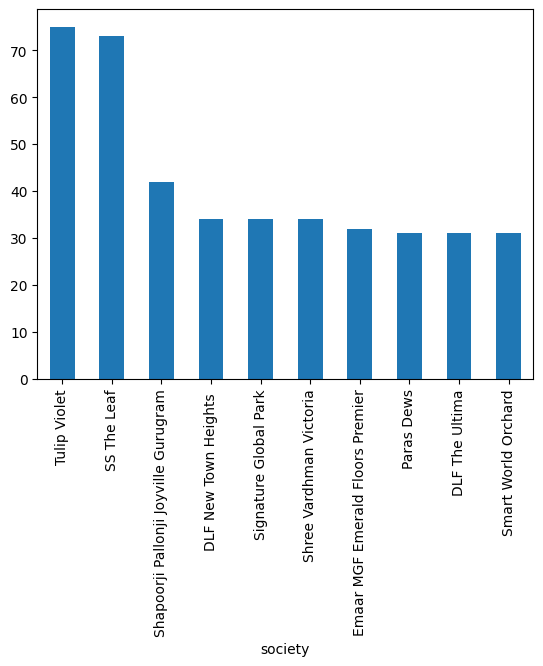

In [22]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

**Observations**
* Around 13% properties comes under independent tag.
* There are 675 societies.
* The top 76 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
* Very High (>100): Only 1 society has more than 100 listings.
* High (50-100): 2 societies have between 50 to 100 listings.
* Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
* Low (2-9): 274 societies have between 2 to 9 listings.
* Very Low (1): A significant number, 308 societies, have only 1 listing.
* 500 missing value

In [23]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areawithtype,bedroom,bathroom,balcony,...,built_up_area,carpet_area,study_room,store_room,others_room,pooja_room,na_room,servant_room,furnishing_type,luxury_score
1055,flat,NaN,gwal pahari,7.00,11000.0,6364.0,Super Built up area 6000(557.42 sq.m.),4,4,3+,...,NaN,NaN,0,0,0,0,0,1,2,52
2708,flat,NaN,sector 78,0.60,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,No,...,1625.0,NaN,0,0,0,0,0,0,2,0
2937,houses,NaN,sector 43,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,3+,...,549.0,NaN,0,0,0,0,0,1,2,20
2938,houses,NaN,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,...,1161.0,NaN,0,0,0,0,0,1,1,49
2939,houses,NaN,sector 43,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),12,12,3+,...,558.0,NaN,0,0,1,0,0,0,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,houses,NaN,sector 46,5.65,23870.0,2367.0,Plot area 263(219.9 sq.m.),8,6,3+,...,2367.0,NaN,0,0,0,0,0,1,0,67
3799,houses,NaN,sector 46,3.55,24500.0,1449.0,Plot area 161(134.62 sq.m.),5,4,3+,...,1449.0,NaN,0,0,0,0,0,1,0,73
3800,houses,NaN,sector 46,3.60,24845.0,1449.0,Plot area 161(134.62 sq.m.),5,5,3+,...,1449.0,NaN,0,0,0,0,0,1,0,75
3801,houses,NaN,sector 55,3.10,20026.0,1548.0,Plot area 172(143.81 sq.m.),5,4,3+,...,1548.0,NaN,0,1,0,0,0,1,0,59


In [24]:
df['sector'].value_counts().shape

(117,)

In [25]:
df['sector'].isnull().sum()

0

<Axes: xlabel='sector'>

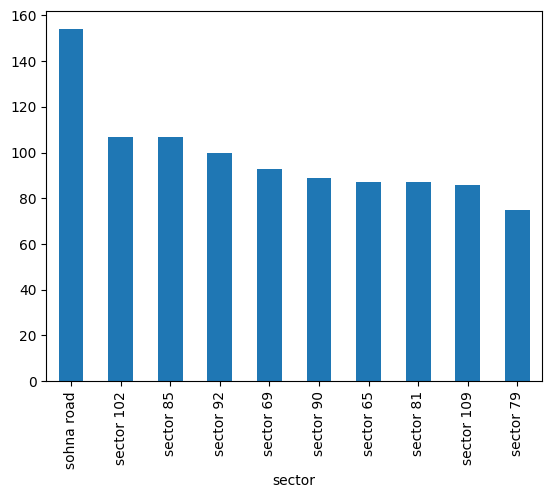

In [26]:
df['sector'].value_counts().head(10).plot(kind='bar')

In [27]:
sector_counts = df['sector'].value_counts()

# Frequency distribution for sector
frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 26,
 'Average (10-49)': 63,
 'Low (2-9)': 24,
 'Very Low (1)': 1}

**Observations**
* There are a total of 117 unique sectors in the dataset.
 Frequency distribution of sectors:
* Very High (>100): 3 sectors have more than 100 listings.
* High (50-100): 25 sectors have between 50 to 100 listings.
* Average (10-49): A majority, 63 sectors, fall in this range with 10 to 49
 listings each.
* Low (2-9): 16 sectors have between 2 to 9 listings.
* Very Low (1): Interestingly, there are is 1 sector with only 1 listing.

**Price**


In [28]:
df['price'].value_counts()

price
1.25    80
0.90    65
1.50    64
1.20    64
1.10    62
        ..
2.69     1
2.54     1
3.23     1
7.90     1
6.09     1
Name: count, Length: 478, dtype: int64

In [29]:
df['price'].isnull().sum()

26

In [30]:
df['price'].describe()

count    3656.000000
mean        2.535245
std         2.981371
min         0.075000
25%         0.950000
50%         1.525000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

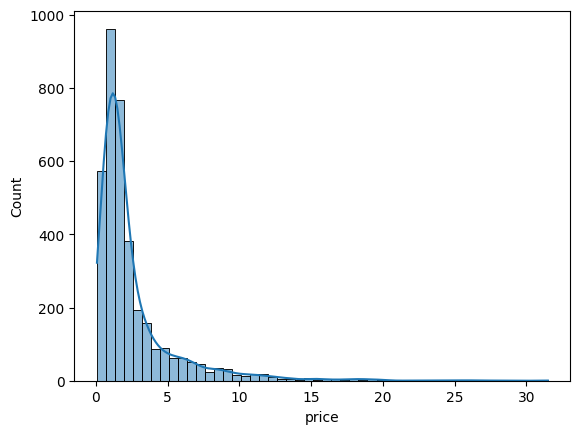

In [31]:
sns.histplot(x=df['price'],bins=50,kde=True,data=df)

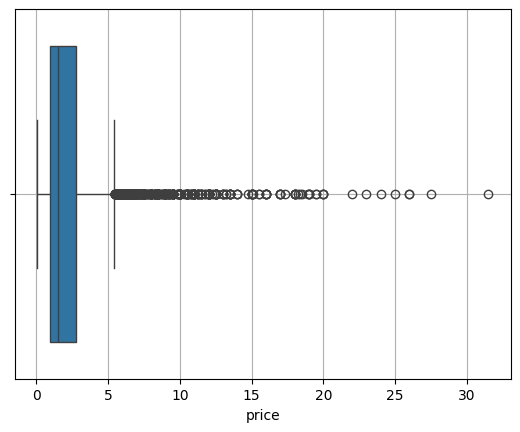

In [32]:
sns.boxplot(x=df['price'],data=df)
plt.grid()

**Descriptive Statistics:**

* Count: There are 3,660 non-missing price entries.
* Mean Price: The average price is approximately 2.53 crores.
* Median Price: The median (or 50th percentile) price is 1.52 crores.
* Standard Deviation: The prices have a standard deviation of 2.98, indicating
 variability in the prices.
* Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
* IQR: The interquartile range (difference between 75th and 25th percentile) is
 from 0.95 crores to 2.75 crores.
Visualizations:

Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.

Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.

* Missing Values: There are 26 missing values in the price column.

In [33]:
skweness = df['price'].skew()
kurtosis = df['price'].kurt()
print(skweness,kurtosis)

3.279079647746861 14.92773179854837


**Skewness:** The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis:** The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [34]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.25
0.05     0.38
0.95     8.50
0.99    15.28
Name: price, dtype: float64


**Quantile Analysis:**

* 1% Quantile: Only 1% of properties are priced below 0.25 crores.
* 5% Quantile: 5% of properties are priced below 0.37 crores.
* 95% Quantile: 95% of properties are priced below 8.5 crores.
* 99% Quantile: 99% of properties are priced below 15.26 crores, indicating  
  that very few properties are priced above this value.

In [35]:
# Identifying Outliers from IQR
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.8

In [36]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [37]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape[0]

425

In [38]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

**Outliers Analysis (using IQR method):**

* Based on the IQR method, there are 425 properties considered as outliers.
* These outliers have an average price of approximately 9.24 crores.
* The range for these outliers is from 5.46 crores to 31.5 crores.

In [39]:
price_frequency = df['price'].value_counts()

<Axes: xlabel='price'>

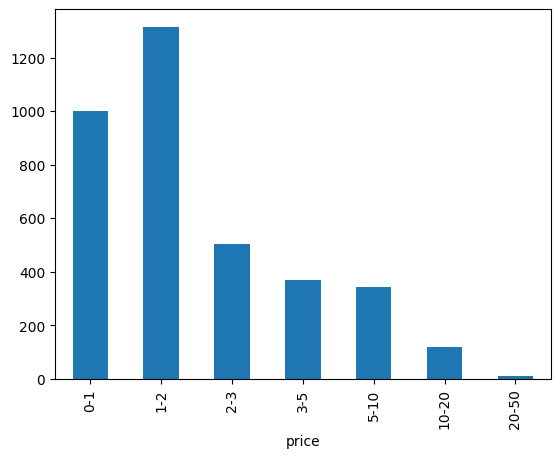

In [40]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

* The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
* There's a significant drop in the number of properties priced above "5 crores."

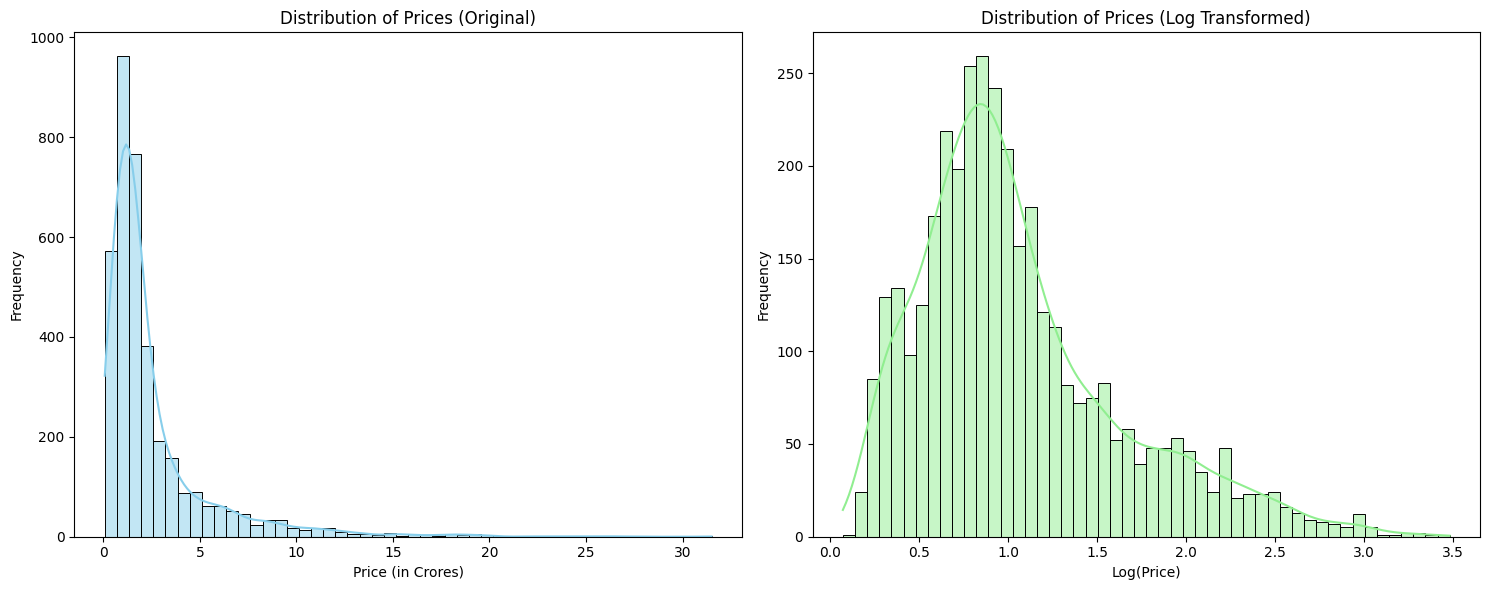

In [41]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

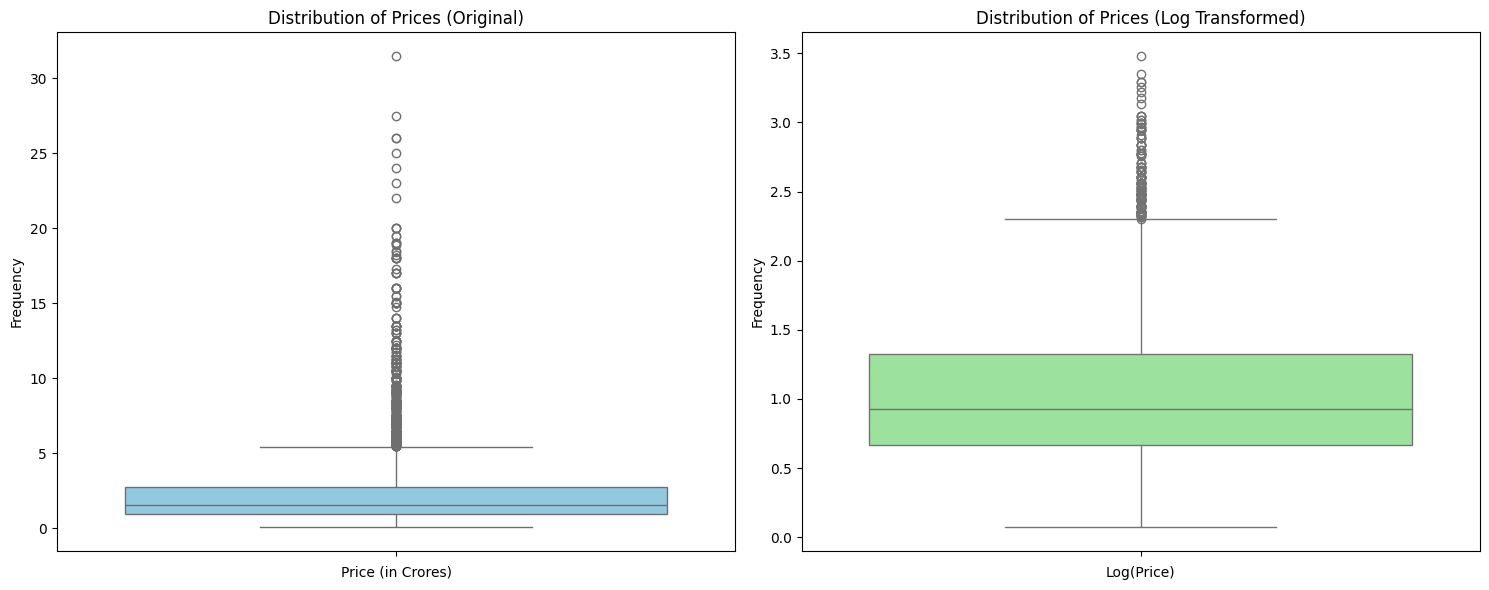

In [42]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Why Use np.log1p?**
* Numerical Stability: For values of 𝑥  close to zero, computing the natural logarithm directly using np.log(1 + x) can lead to numerical inaccuracies due to floating-point precision limitations. np.log1p(x) is specifically designed to handle these cases more accurately.

* Handling Zero and Negative Values: In many datasets, especially those involving prices or counts, you might encounter zeros. The logarithm of zero is undefined, but np.log1p(0) is defined and equals zero. This ensures that the transformation is applicable to the entire dataset.

* Compression of Scale: Logarithmic transformation compresses the range of the data, which can make it easier to handle and model, especially for datasets with highly skewed distributions.

**Transforming the Data**

To transform a column, such as a price column, you can use np.log1p. This is particularly useful for skewed data, as it can make the data more normally distributed, which is beneficial for many statistical methods and machine learning models.

**Price_Per_sqft**

In [43]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areawithtype', 'bedroom', 'bathroom', 'balcony', 'floornum', 'facing',
       'agepossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study_room', 'store_room', 'others_room', 'pooja_room', 'na_room',
       'servant_room', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [44]:
df['price_per_sqft'].isnull().sum()

26

In [45]:
df['price_per_sqft'].describe()

count      3656.000000
mean      13914.321937
std       23241.897624
min           4.000000
25%        6823.500000
50%        9021.000000
75%       13888.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

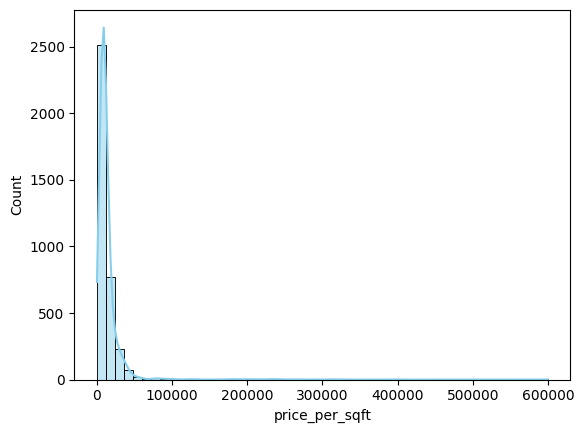

In [46]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: ylabel='price_per_sqft'>

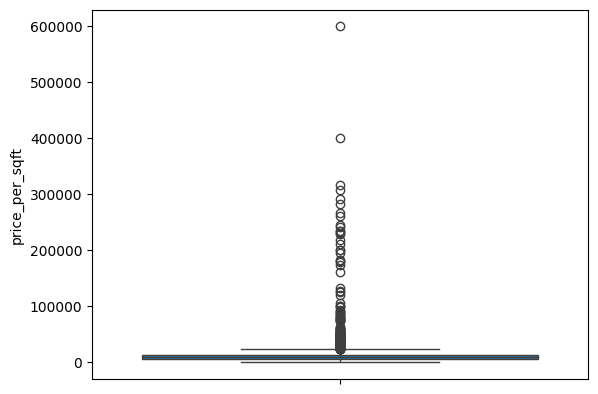

In [47]:
sns.boxplot(df['price_per_sqft'])

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

**Observations**
* Potential Outliers
* Right Skewed
* 26 missing values

Bedroom

In [48]:
df['bedroom'].isnull().sum()

0

In [49]:
df['bedroom'].value_counts()

bedroom
3     1498
2      940
4      660
5      212
1      124
6       74
9       42
7       30
8       30
12      28
10      20
16      12
13       4
19       2
18       2
14       1
20       1
21       1
11       1
Name: count, dtype: int64

<Axes: xlabel='bedroom'>

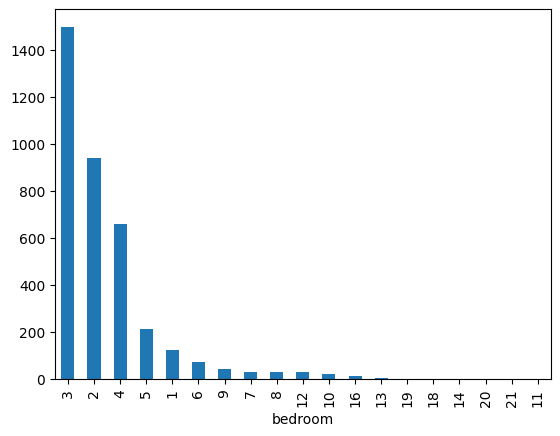

In [50]:
df['bedroom'].value_counts().plot(kind='bar')

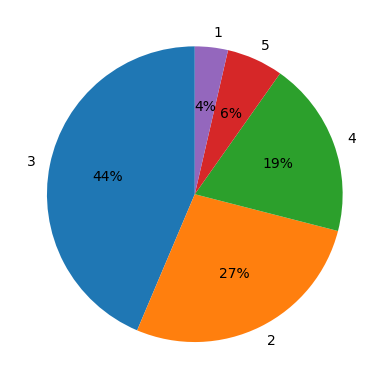

In [51]:
fig , ax = plt.subplots()
ax.pie(x=df['bedroom'].value_counts().head(),startangle=90,autopct="%.0f%%",normalize=True,labels=df['bedroom'].value_counts().index[:5]);

Bathroom

In [52]:
df['bathroom'].value_counts()

bathroom
3     1078
2     1048
4      819
5      294
1      156
6      119
9       42
7       40
8       26
12      22
10       9
16       8
13       4
18       4
11       4
20       3
17       3
14       2
21       1
Name: count, dtype: int64

<Axes: xlabel='bathroom'>

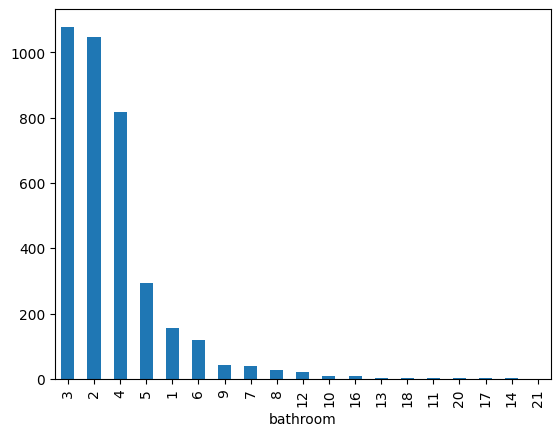

In [53]:
df['bathroom'].value_counts().plot(kind='bar')

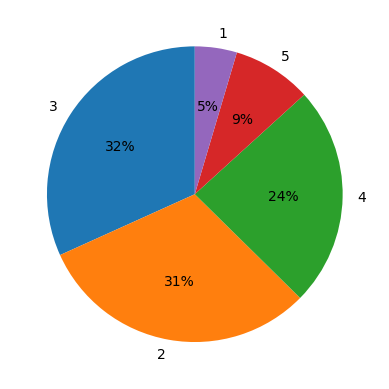

In [54]:
fig , ax = plt.subplots()
ax.pie(x=df['bathroom'].value_counts().head(),startangle=90,autopct="%.0f%%",normalize=True,labels=df['bathroom'].value_counts().index[:5]);

Balcony

<Axes: xlabel='balcony'>

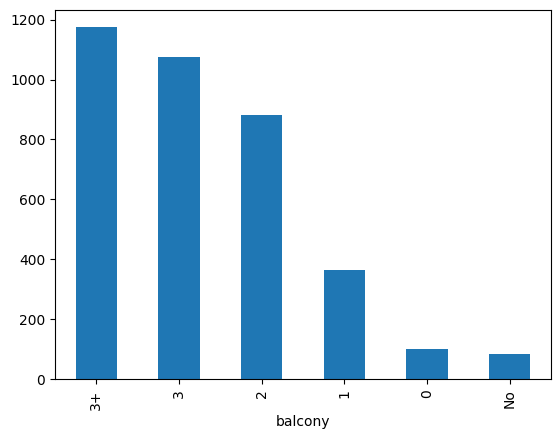

In [55]:
df['balcony'].value_counts().plot(kind='bar')

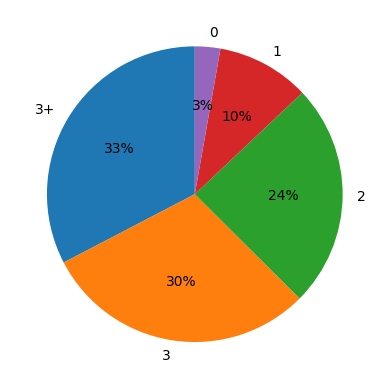

In [56]:
fig , ax = plt.subplots()
ax.pie(x=df['balcony'].value_counts().head(),startangle=90,autopct="%.0f%%",normalize=True,labels=df['balcony'].value_counts().index[:5]);

In [57]:
df['floornum'].isnull().sum()

2

In [58]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areawithtype', 'bedroom', 'bathroom', 'balcony', 'floornum', 'facing',
       'agepossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study_room', 'store_room', 'others_room', 'pooja_room', 'na_room',
       'servant_room', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [59]:
df['floornum'].describe()

count    3680.000000
mean        6.758696
std         6.015512
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floornum, dtype: float64

<Axes: xlabel='floornum'>

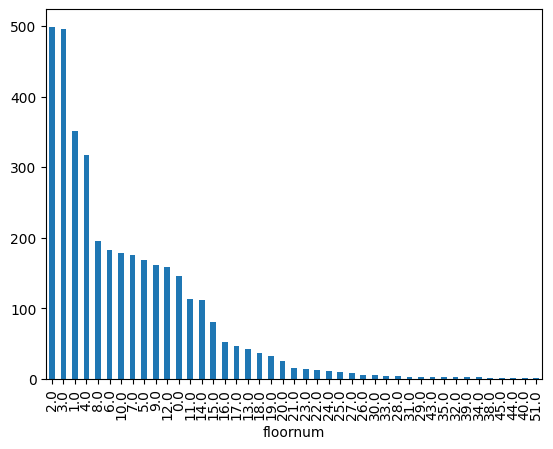

In [60]:
df['floornum'].value_counts().plot(kind='bar')

<Axes: ylabel='floornum'>

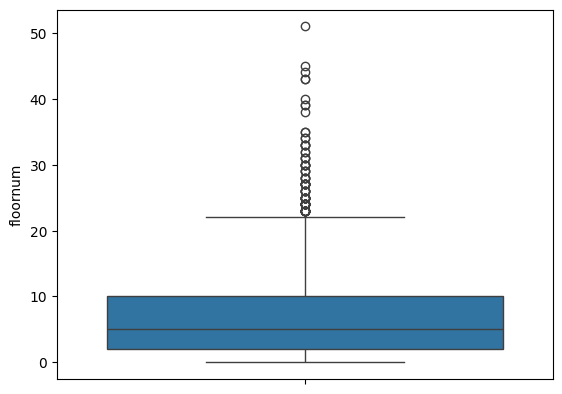

In [61]:
sns.boxplot(data=df['floornum'])

* The majority of the properties lie between the ground floor (0) and the 25th floor.
* Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
* There are a few properties located at higher floors, but their frequency is much lower.
* The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
* Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

In [62]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areawithtype', 'bedroom', 'bathroom', 'balcony', 'floornum', 'facing',
       'agepossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study_room', 'store_room', 'others_room', 'pooja_room', 'na_room',
       'servant_room', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [63]:
df['facing'].isnull().sum()

0

In [64]:
df['facing'].value_counts()

facing
na            1049
north-east     624
east           623
north          387
west           248
south          231
north-west     193
south-east     173
south-west     154
Name: count, dtype: int64

<Axes: xlabel='facing'>

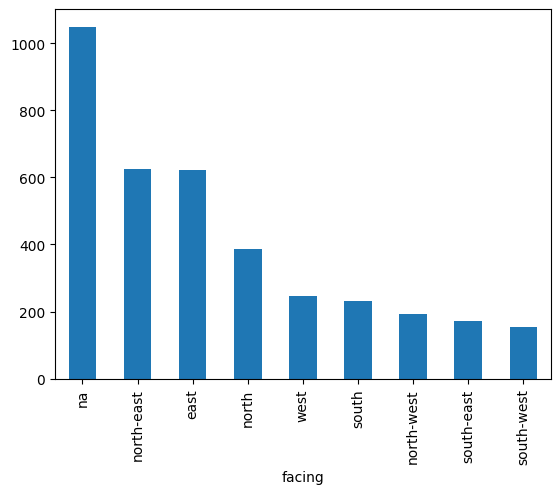

In [65]:
df['facing'].value_counts().plot(kind='bar')

In [67]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areawithtype', 'bedroom', 'bathroom', 'balcony', 'floornum', 'facing',
       'agepossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study_room', 'store_room', 'others_room', 'pooja_room', 'na_room',
       'servant_room', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [68]:
df['agepossession'].isnull().sum()

0

In [69]:
df['agepossession'].value_counts()

agepossession
relatively new property        1644
undefined                       818
moderately old property         563
old propety                     303
under construction property     264
new property                     90
Name: count, dtype: int64

<Axes: xlabel='agepossession'>

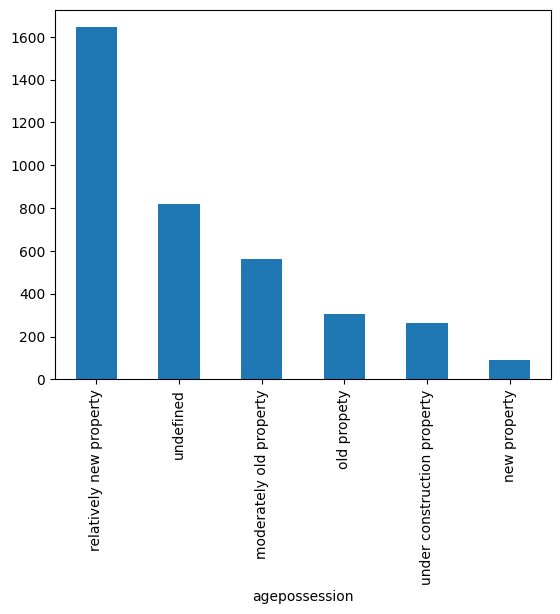

In [70]:
df['agepossession'].value_counts().plot(kind='bar')

In [71]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areawithtype', 'bedroom', 'bathroom', 'balcony', 'floornum', 'facing',
       'agepossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study_room', 'store_room', 'others_room', 'pooja_room', 'na_room',
       'servant_room', 'furnishing_type', 'luxury_score'],
      dtype='object')

**Area**

In [72]:
# super built up area
df['super_built_up_area'].isnull().sum()

1808

In [73]:
df['super_built_up_area'].describe()

count     1874.000000
mean      1925.397305
std        764.300221
min         89.000000
25%       1479.250000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

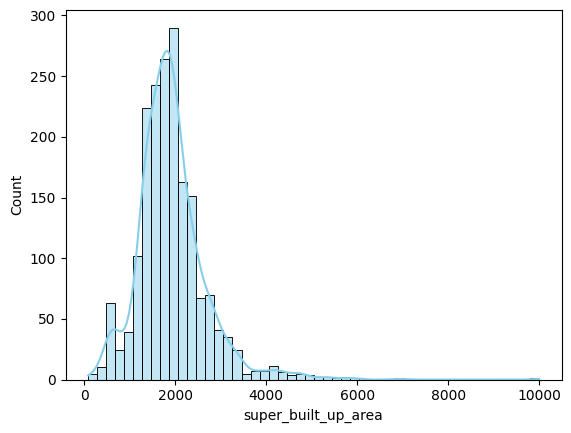

In [74]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: ylabel='super_built_up_area'>

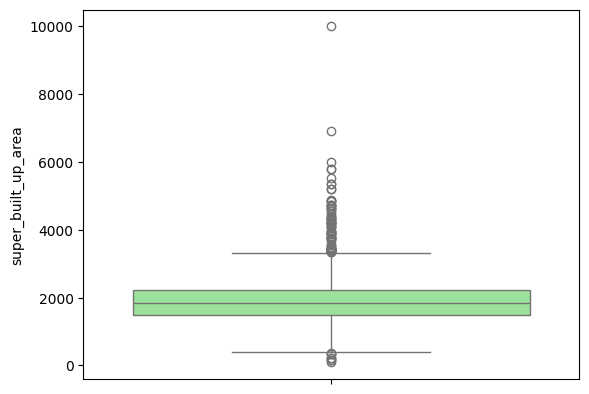

In [75]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

* Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
* There are a few properties with a significantly larger area, leading to a right-skewed distribution.
* The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
* There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [76]:
# built up area
df['built_up_area'].isnull().sum()

1985

In [77]:
df['built_up_area'].describe()

count      1697.000000
mean       2375.363011
std       17905.947912
min          14.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

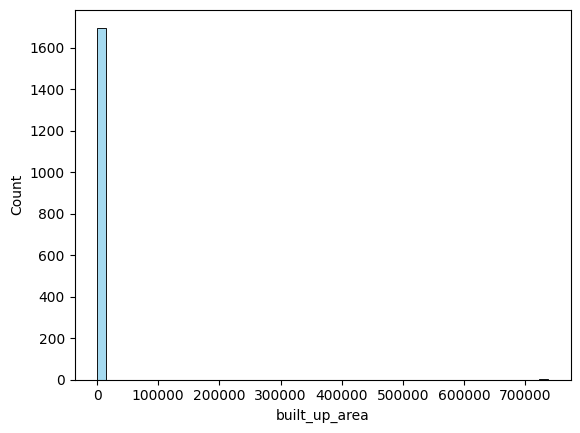

In [78]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='built_up_area'>

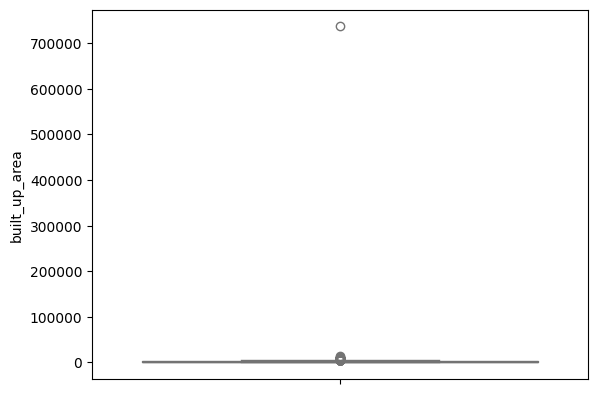

In [79]:
sns.boxplot(df['built_up_area'].dropna(), color='lightgreen')

* Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
* There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
* The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.
* The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [80]:
# carpet area
df['carpet_area'].isnull().sum()

1812

In [81]:

df['carpet_area'].describe()

count      1870.000000
mean       2531.602694
std       22811.850186
min          15.000000
25%         845.000000
50%        1300.000000
75%        1790.750000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

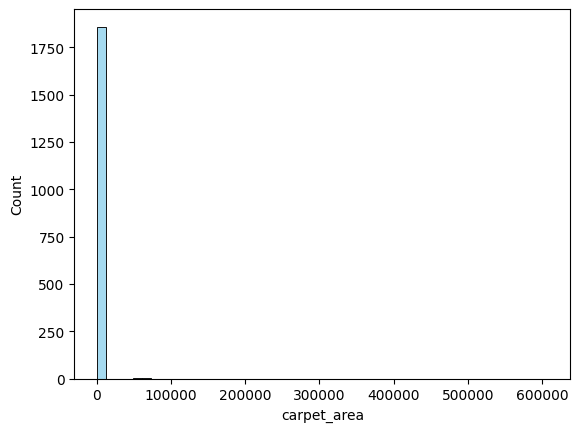

In [82]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)


<Axes: ylabel='carpet_area'>

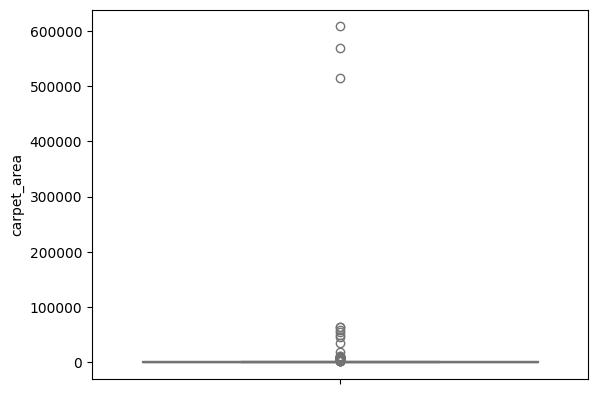

In [83]:
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')

**Additionalroom**

In [88]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areawithtype', 'bedroom', 'bathroom', 'balcony', 'floornum', 'facing',
       'agepossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study_room', 'store_room', 'others_room', 'pooja_room', 'na_room',
       'servant_room', 'furnishing_type', 'luxury_score'],
      dtype='object')

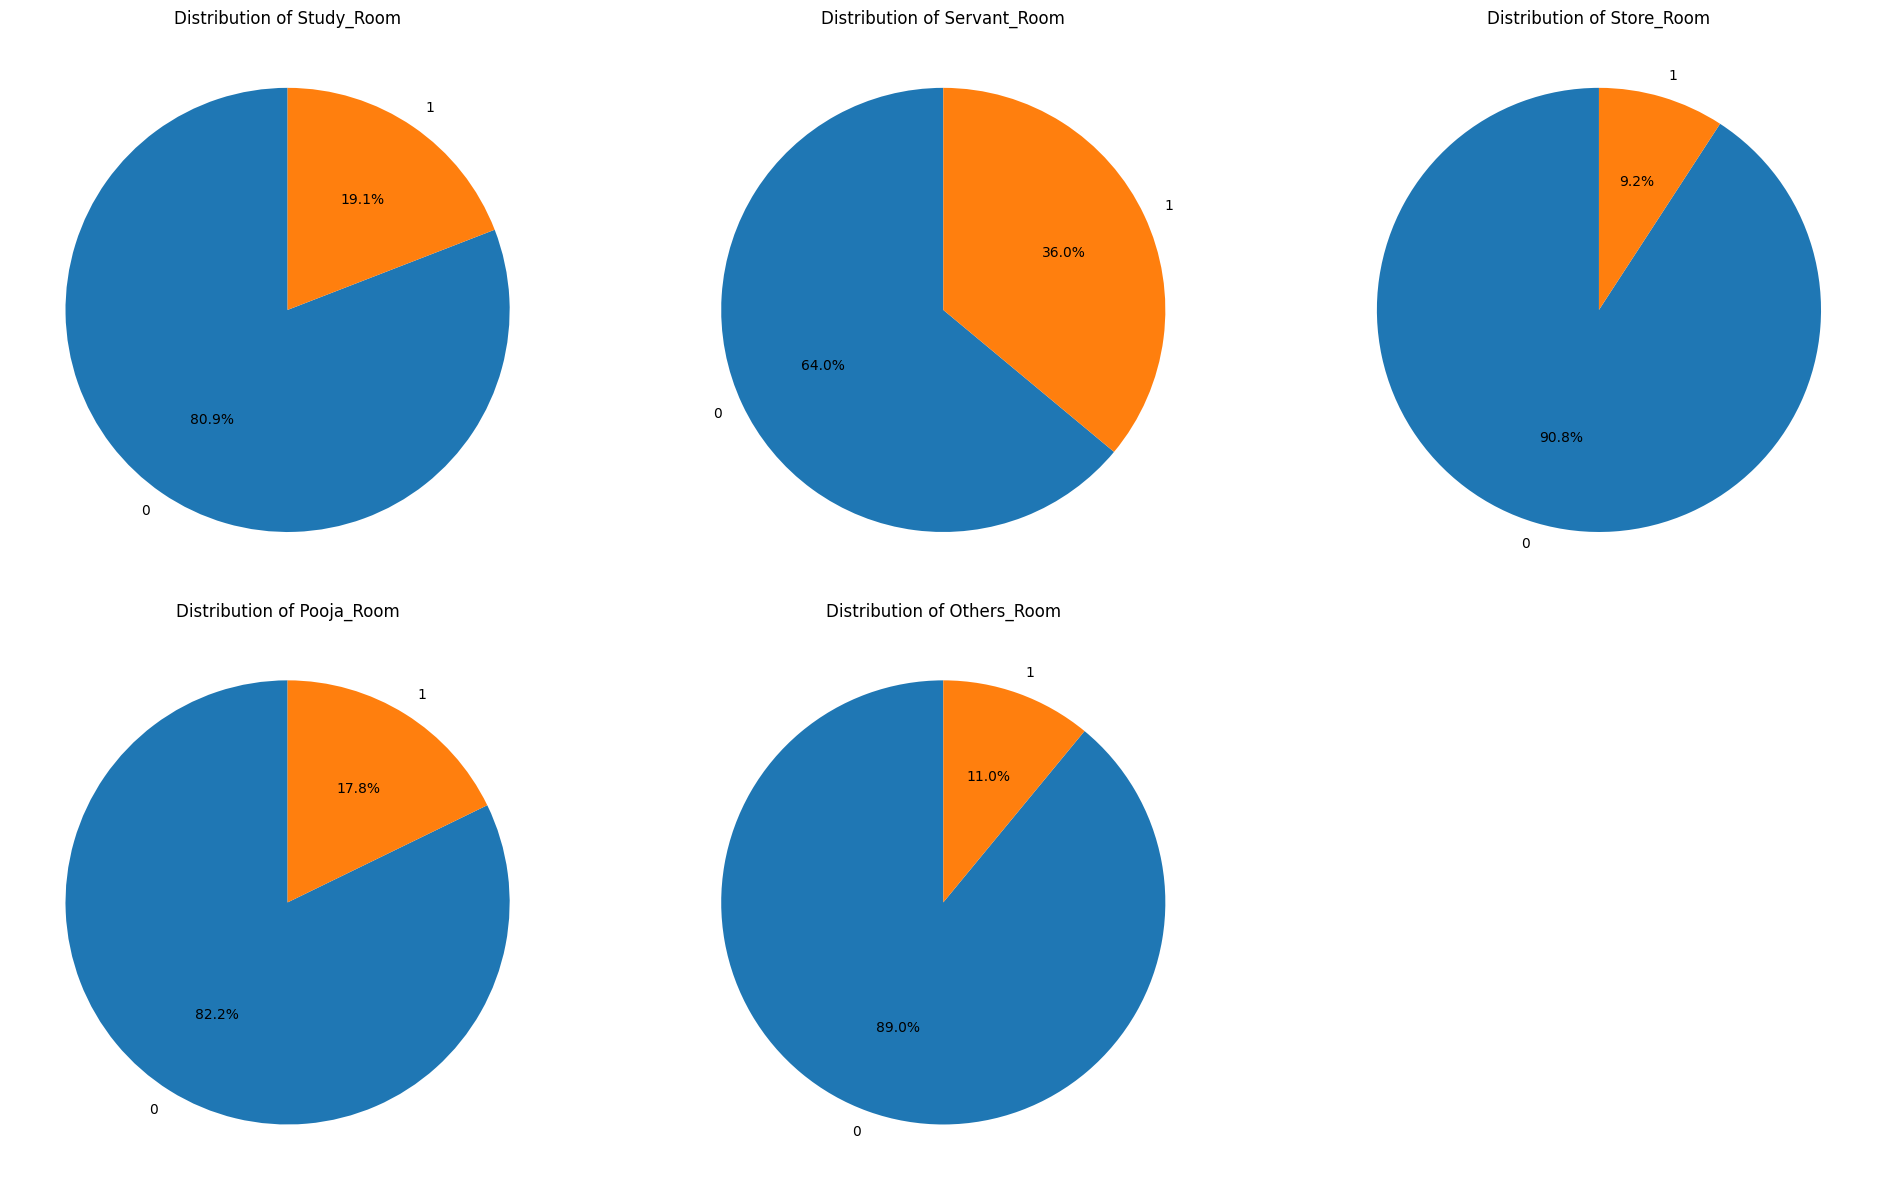

In [85]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study_room','servant_room','store_room','pooja_room','others_room'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

Furnishing_type

In [89]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areawithtype', 'bedroom', 'bathroom', 'balcony', 'floornum', 'facing',
       'agepossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study_room', 'store_room', 'others_room', 'pooja_room', 'na_room',
       'servant_room', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [90]:
df['furnishing_type'].value_counts()

furnishing_type
2    2410
0    1061
1     211
Name: count, dtype: int64

<Axes: ylabel='count'>

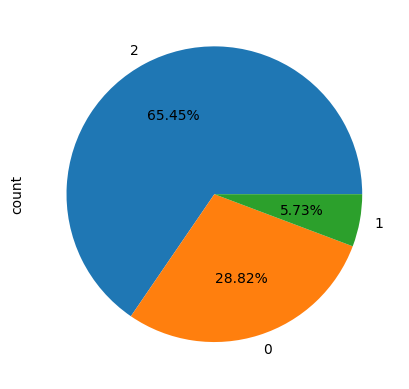

In [92]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [94]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areawithtype', 'bedroom', 'bathroom', 'balcony', 'floornum', 'facing',
       'agepossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study_room', 'store_room', 'others_room', 'pooja_room', 'na_room',
       'servant_room', 'furnishing_type', 'luxury_score'],
      dtype='object')

Luxury Score

In [95]:
df['luxury_score'].value_counts()

luxury_score
0      609
49     344
174    195
44      58
165     55
      ... 
154      3
17       3
147      2
169      1
155      1
Name: count, Length: 160, dtype: int64

In [96]:
df['luxury_score'].isnull().sum()

0

<Axes: xlabel='luxury_score', ylabel='Count'>

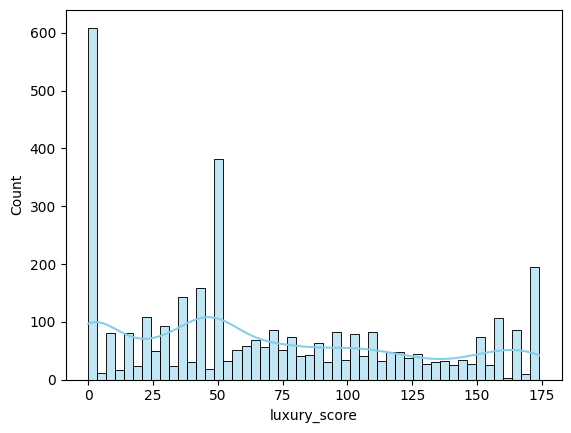

In [98]:

sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='luxury_score'>

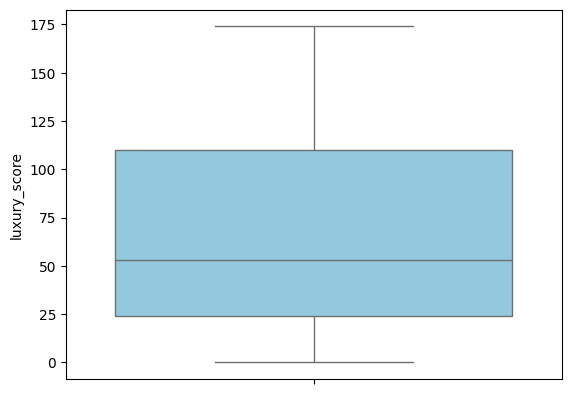

In [99]:
sns.boxplot(df['luxury_score'], color='skyblue')

* The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

* The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.